Random Dataset

# Data Normalization
Normalization is the process of scaling data to fit within a specific range or distribution, making it easier to compare features or improve the performance of machine learning models. Below are three common normalization techniques: Min-Max, Z-Score, and Decimal Scaling.

In [9]:
import pandas as pd
import numpy as np

data = {
    'age': [23, 45, 31, np.nan, 29, 41, 54, np.nan, 38, 27, 30, 120, 25, np.nan, 48, 38, 29, 150, 33, 40],
    'salary': [50000, 60000, 52000, 48000, 55000, 62000, np.nan, 58000, 54000, 51000, 500000, 62000, np.nan, 60000, 65000, 59000, 53000, 45000, np.nan, 61000],
    'exp': [1, 10, 4, 2, 5, 11, 20, np.nan, 6, 3, 2, 15, 1, np.nan, 9, 5, 3, 22, 4, 7]
}

df = pd.DataFrame(data)
print(df)


      age    salary   exp
0    23.0   50000.0   1.0
1    45.0   60000.0  10.0
2    31.0   52000.0   4.0
3     NaN   48000.0   2.0
4    29.0   55000.0   5.0
5    41.0   62000.0  11.0
6    54.0       NaN  20.0
7     NaN   58000.0   NaN
8    38.0   54000.0   6.0
9    27.0   51000.0   3.0
10   30.0  500000.0   2.0
11  120.0   62000.0  15.0
12   25.0       NaN   1.0
13    NaN   60000.0   NaN
14   48.0   65000.0   9.0
15   38.0   59000.0   5.0
16   29.0   53000.0   3.0
17  150.0   45000.0  22.0
18   33.0       NaN   4.0
19   40.0   61000.0   7.0


# 1. Min-Max Normalization
**Definition:**

Min-Max normalization scales the data to a fixed range, typically between 0 and 1. This technique preserves the relationships between data points by keeping the distribution shape unchanged.


**Formula:**       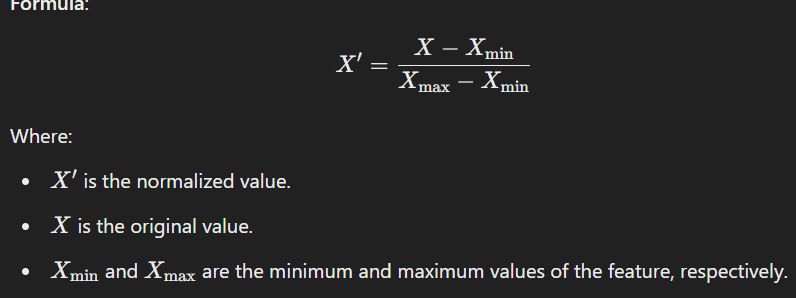

In [2]:
def min_max_normalize(col):
    min_val = col.min()
    max_val = col.max()
    normalized_col = (col - min_val) / (max_val - min_val)
    return normalized_col

df['age_min_max'] = min_max_normalize(df['age'])
df['salary_min_max'] = min_max_normalize(df['salary'])
df['exp_min_max'] = min_max_normalize(df['exp'])

print("Min-Max Normalization:")
print(df[['age_min_max', 'salary_min_max', 'exp_min_max']])


Min-Max Normalization:
    age_min_max  salary_min_max  exp_min_max
0      0.000000        0.010989     0.000000
1      0.173228        0.032967     0.428571
2      0.062992        0.015385     0.142857
3           NaN        0.006593     0.047619
4      0.047244        0.021978     0.190476
5      0.141732        0.037363     0.476190
6      0.244094             NaN     0.904762
7           NaN        0.028571          NaN
8      0.118110        0.019780     0.238095
9      0.031496        0.013187     0.095238
10     0.055118        1.000000     0.047619
11     0.763780        0.037363     0.666667
12     0.015748             NaN     0.000000
13          NaN        0.032967          NaN
14     0.196850        0.043956     0.380952
15     0.118110        0.030769     0.190476
16     0.047244        0.017582     0.095238
17     1.000000        0.000000     1.000000
18     0.078740             NaN     0.142857
19     0.133858        0.035165     0.285714


# Summary:
**Min-Max Normalization:**

Scales data to a range of [0, 1], preserving relationships between data points.

# 2. Z-Score Normalization
**Definition:**

 Z-Score normalization (or standardization) transforms the data by centering it around the mean with a unit standard deviation. This method is useful when the features have different units or distributions.
 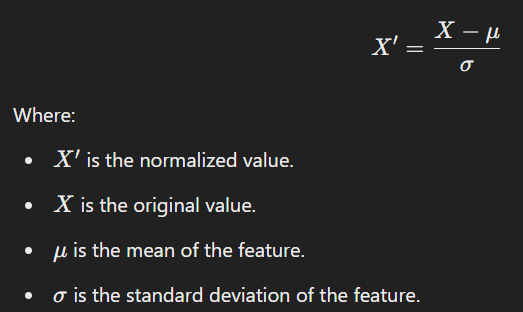

In [3]:
def z_score_normalize(col):
    mean = col.mean()
    std = col.std()
    normalized_col = (col - mean) / std
    return normalized_col

df['age_z_score'] = z_score_normalize(df['age'])
df['salary_z_score'] = z_score_normalize(df['salary'])
df['exp_z_score'] = z_score_normalize(df['exp'])

print("Z-Score Normalization:")
print(df[['age_z_score', 'salary_z_score', 'exp_z_score']])


Z-Score Normalization:
    age_z_score  salary_z_score  exp_z_score
0     -0.698260       -0.297266    -0.993278
1     -0.061311       -0.204541     0.443428
2     -0.466642       -0.278721    -0.514376
3           NaN       -0.315811    -0.833644
4     -0.524547       -0.250903    -0.354742
5     -0.177120       -0.185996     0.603062
6      0.199260             NaN     2.039768
7           NaN       -0.223086          NaN
8     -0.263976       -0.260176    -0.195108
9     -0.582451       -0.287993    -0.674010
10    -0.495595        3.875364    -0.833644
11     2.110109       -0.185996     1.241598
12    -0.640356             NaN    -0.993278
13          NaN       -0.204541          NaN
14     0.025546       -0.158178     0.283794
15    -0.263976       -0.213813    -0.354742
16    -0.524547       -0.269448    -0.674010
17     2.978677       -0.343628     2.359036
18    -0.408738             NaN    -0.514376
19    -0.206072       -0.195268    -0.035474


# Summary:
**Z-Score Normalization:**

 Centers data around the mean with a standard deviation of 1, making it suitable for features with different units or distributions.

# 3. Decimal Scaling Normalization
**Definition:**

Decimal Scaling normalization scales the data by moving the decimal point of values based on the maximum absolute value in the dataset. This technique ensures that the normalized values are within a specific range.


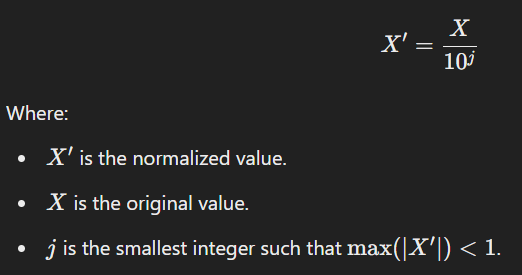

In [4]:
def decimal_scaling_normalize(col):
    max_val = col.abs().max()
    scaling_factor = np.ceil(np.log10(max_val))
    normalized_col = col / (10 ** scaling_factor)
    return normalized_col

df['age_decimal'] = decimal_scaling_normalize(df['age'])
df['salary_decimal'] = decimal_scaling_normalize(df['salary'])
df['exp_decimal'] = decimal_scaling_normalize(df['exp'])

print("Decimal Scaling Normalization:")
print(df[['age_decimal', 'salary_decimal', 'exp_decimal']])


Decimal Scaling Normalization:
    age_decimal  salary_decimal  exp_decimal
0         0.023           0.050         0.01
1         0.045           0.060         0.10
2         0.031           0.052         0.04
3           NaN           0.048         0.02
4         0.029           0.055         0.05
5         0.041           0.062         0.11
6         0.054             NaN         0.20
7           NaN           0.058          NaN
8         0.038           0.054         0.06
9         0.027           0.051         0.03
10        0.030           0.500         0.02
11        0.120           0.062         0.15
12        0.025             NaN         0.01
13          NaN           0.060          NaN
14        0.048           0.065         0.09
15        0.038           0.059         0.05
16        0.029           0.053         0.03
17        0.150           0.045         0.22
18        0.033             NaN         0.04
19        0.040           0.061         0.07


# Summary:
**Decimal Scaling Normalization:**

Scales data by adjusting the decimal point, ensuring normalized values fall within a specific range

# With csv File

---



Importing file

In [5]:
from google.colab import files
uploaded = files.upload()


Saving Toyota.csv to Toyota.csv


In [6]:
import pandas as pd
import numpy as np

# Load the dataset from a CSV file
df = pd.read_csv('Toyota.csv')
print(df)

      Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  Weight  
0    

1.Min-Max Normalization

In [15]:
def min_max_normalize(col):
    min_val = col.min()
    max_val = col.max()
    normalized_col = (col - min_val) / (max_val - min_val)
    return normalized_col

df['age_min_max'] = min_max_normalize(df['age'])
df['salary_min_max'] = min_max_normalize(df['salary'])
df['exp_min_max'] = min_max_normalize(df['exp'])

print("Min-Max Normalization:")
print(df[['age_min_max', 'salary_min_max', 'exp_min_max']])


Min-Max Normalization:
    age_min_max  salary_min_max  exp_min_max
0      0.000000        0.010989     0.000000
1      0.173228        0.032967     0.428571
2      0.062992        0.015385     0.142857
3           NaN        0.006593     0.047619
4      0.047244        0.021978     0.190476
5      0.141732        0.037363     0.476190
6      0.244094             NaN     0.904762
7           NaN        0.028571          NaN
8      0.118110        0.019780     0.238095
9      0.031496        0.013187     0.095238
10     0.055118        1.000000     0.047619
11     0.763780        0.037363     0.666667
12     0.015748             NaN     0.000000
13          NaN        0.032967          NaN
14     0.196850        0.043956     0.380952
15     0.118110        0.030769     0.190476
16     0.047244        0.017582     0.095238
17     1.000000        0.000000     1.000000
18     0.078740             NaN     0.142857
19     0.133858        0.035165     0.285714


2.Z-Score

In [14]:
def z_score_normalize(col):
    mean = col.mean()
    std = col.std()
    normalized_col = (col - mean) / std
    return normalized_col

df['age_z_score'] = z_score_normalize(df['age'])
df['salary_z_score'] = z_score_normalize(df['salary'])
df['exp_z_score'] = z_score_normalize(df['exp'])

print("Z-Score Normalization:")
print(df[['age_z_score', 'salary_z_score', 'exp_z_score']])


Z-Score Normalization:
    age_z_score  salary_z_score  exp_z_score
0     -0.698260       -0.297266    -0.993278
1     -0.061311       -0.204541     0.443428
2     -0.466642       -0.278721    -0.514376
3           NaN       -0.315811    -0.833644
4     -0.524547       -0.250903    -0.354742
5     -0.177120       -0.185996     0.603062
6      0.199260             NaN     2.039768
7           NaN       -0.223086          NaN
8     -0.263976       -0.260176    -0.195108
9     -0.582451       -0.287993    -0.674010
10    -0.495595        3.875364    -0.833644
11     2.110109       -0.185996     1.241598
12    -0.640356             NaN    -0.993278
13          NaN       -0.204541          NaN
14     0.025546       -0.158178     0.283794
15    -0.263976       -0.213813    -0.354742
16    -0.524547       -0.269448    -0.674010
17     2.978677       -0.343628     2.359036
18    -0.408738             NaN    -0.514376
19    -0.206072       -0.195268    -0.035474


3.Decimal Scaling

In [13]:
def decimal_scaling_normalize(col):
    max_val = col.abs().max()
    scaling_factor = np.ceil(np.log10(max_val))
    normalized_col = col / (10 ** scaling_factor)
    return normalized_col

df['age_decimal'] = decimal_scaling_normalize(df['Price'])
df['salary_decimal'] = decimal_scaling_normalize(df['Age'])
df['exp_decimal'] = decimal_scaling_normalize(df['KM'])

print("Decimal Scaling Normalization:")
print(df[['age_decimal', 'salary_decimal', 'exp_decimal']])


Decimal Scaling Normalization:
    age_decimal  salary_decimal  exp_decimal
0         0.023           0.050         0.01
1         0.045           0.060         0.10
2         0.031           0.052         0.04
3           NaN           0.048         0.02
4         0.029           0.055         0.05
5         0.041           0.062         0.11
6         0.054             NaN         0.20
7           NaN           0.058          NaN
8         0.038           0.054         0.06
9         0.027           0.051         0.03
10        0.030           0.500         0.02
11        0.120           0.062         0.15
12        0.025             NaN         0.01
13          NaN           0.060          NaN
14        0.048           0.065         0.09
15        0.038           0.059         0.05
16        0.029           0.053         0.03
17        0.150           0.045         0.22
18        0.033             NaN         0.04
19        0.040           0.061         0.07
